# Sentiment Analyis Dataset

In [21]:
!pip install datasets

In [22]:
import pandas as pd

In [23]:
from datasets import load_dataset
ds = load_dataset("NebulaByte/E-Commerce_Customer_Support_Conversations")

In [24]:
print(ds)

DatasetDict({
    train: Dataset({
        features: ['issue_area', 'issue_category', 'issue_sub_category', 'issue_category_sub_category', 'customer_sentiment', 'product_category', 'product_sub_category', 'issue_complexity', 'agent_experience_level', 'agent_experience_level_desc', 'conversation'],
        num_rows: 1000
    })
})


In [25]:
dataset = ds['train'].to_pandas()

# Display the first few rows of the DataFrame
dataset.head(5)

,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,conversation
0,Login and Account,Mobile Number and Email Verification,Verification requirement for mobile number or ...,Mobile Number and Email Verification -> Verifi...,neutral,Appliances,Oven Toaster Grills (OTG),medium,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...
1,Cancellations and returns,Pickup and Shipping,Reasons for being asked to ship the item,Pickup and Shipping -> Reasons for being asked...,neutral,Electronics,Computer Monitor,less,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox customer...
2,Cancellations and returns,Replacement and Return Process,Inability to click the 'Cancel' button,Replacement and Return Process -> Inability to...,neutral,Appliances,Juicer/Mixer/Grinder,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for calling BrownBox Customer...
3,Login and Account,Login Issues and Error Messages,Error message regarding exceeded attempts to e...,Login Issues and Error Messages -> Error messa...,neutral,Appliances,Water Purifier,less,inexperienced,"may struggle with ambiguous queries, rely on c...","Customer: Hi, I am facing an issue while loggi..."
4,Order,Order Delivery Issues,Delivery not attempted again,Order Delivery Issues -> Delivery not attempte...,negative,Electronics,Bp Monitor,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for contacting BrownBox custo...


In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   issue_area                   1000 non-null   object
 1   issue_category               1000 non-null   object
 2   issue_sub_category           1000 non-null   object
 3   issue_category_sub_category  1000 non-null   object
 4   customer_sentiment           1000 non-null   object
 5   product_category             1000 non-null   object
 6   product_sub_category         1000 non-null   object
 7   issue_complexity             1000 non-null   object
 8   agent_experience_level       1000 non-null   object
 9   agent_experience_level_desc  1000 non-null   object
 10  conversation                 1000 non-null   object
dtypes: object(11)
memory usage: 86.1+ KB


In [27]:
dataset['issue_area'].value_counts()

,count
issue_area,
Cancellations and returns,286
Order,270
Login and Account,151
Shopping,116
Warranty,105
Shipping,72


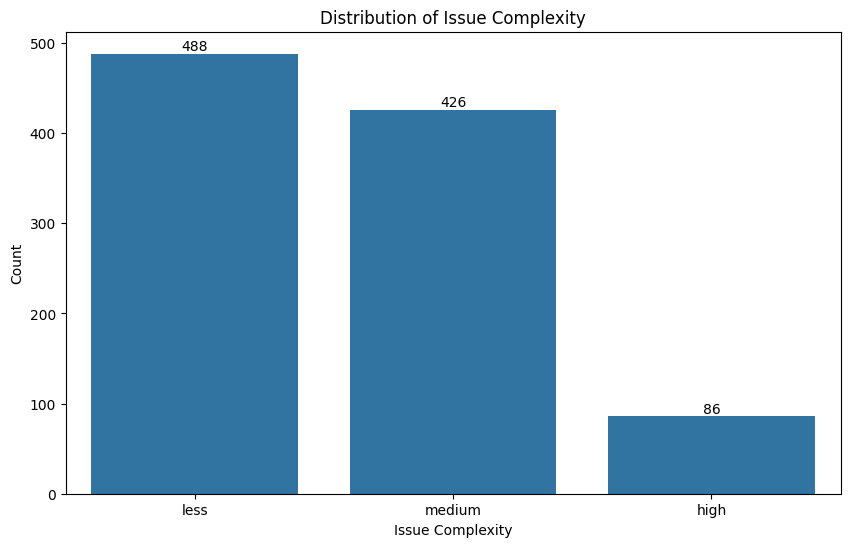

In [28]:
# prompt: a bar graph for 'issue_complexity' and specify the value of the attribute at the top of the bar.

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the value counts for 'issue_complexity'
issue_complexity_counts = dataset['issue_complexity'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=issue_complexity_counts.index, y=issue_complexity_counts.values)
plt.xlabel('Issue Complexity')
plt.ylabel('Count')
plt.title('Distribution of Issue Complexity')

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [29]:
dataset['agent_experience_level'].value_counts()

,count
agent_experience_level,
junior,507
experienced,348
inexperienced,145


In [30]:
dataset['agent_experience_level_desc'].value_counts()

,count
agent_experience_level_desc,
"handles customer inquiries independently, possess solid troubleshooting skills, and seek guidance from more experienced team members when needed.",507
"confidently handles complex customer issues, excel in de-escalation, and possess the ability to empathize with customers, providing them with effective solutions and support.",348
"may struggle with ambiguous queries, rely on clarification from customers or guidance from senior team members, find it difficult to de-escalate tense situations, and may rely on predefined steps or escalate to supervisors for support",145


In [31]:
dataset['customer_sentiment'].value_counts()

,count
customer_sentiment,
neutral,552
negative,316
frustrated,105
positive,27


In [32]:
# 'customer_sentiment' vs each level of 'agent_experience_level'

In [33]:
dataset.loc[dataset['agent_experience_level'].eq("inexperienced"), 'customer_sentiment'].value_counts()

,count
customer_sentiment,
neutral,95
negative,36
frustrated,12
positive,2


In [34]:
dataset.loc[dataset['agent_experience_level'].eq("junior"), 'customer_sentiment'].value_counts()

,count
customer_sentiment,
neutral,266
negative,169
frustrated,54
positive,18


In [35]:
dataset.loc[dataset['agent_experience_level'].eq("experienced"), 'customer_sentiment'].value_counts()

,count
customer_sentiment,
neutral,191
negative,111
frustrated,39
positive,7


In [36]:
dataset.loc[dataset['agent_experience_level'].eq("inexperienced"), 'customer_sentiment'].value_counts()/dataset.loc[dataset['agent_experience_level'].eq("inexperienced"), 'customer_sentiment'].value_counts().sum()*100

,count
customer_sentiment,
neutral,65.517241
negative,24.827586
frustrated,8.275862
positive,1.379310


In [37]:
dataset.loc[dataset['agent_experience_level'].eq("junior"), 'customer_sentiment'].value_counts()/dataset.loc[dataset['agent_experience_level'].eq("junior"), 'customer_sentiment'].value_counts().sum()*100

,count
customer_sentiment,
neutral,52.465483
negative,33.333333
frustrated,10.650888
positive,3.550296


In [38]:
dataset.loc[dataset['agent_experience_level'].eq("experienced"), 'customer_sentiment'].value_counts()/dataset.loc[dataset['agent_experience_level'].eq("experienced"), 'customer_sentiment'].value_counts().sum()*100

,count
customer_sentiment,
neutral,54.885057
negative,31.896552
frustrated,11.206897
positive,2.011494


In [39]:
!pip install openai google-cloud genai transformers

In [40]:
!pip install google.generativeai

In [41]:
import google.generativeai as genai

In [42]:
api_key = "YOUR-API-KEY"
genai.configure(api_key=api_key)
model = genai.GenerativeModel("gemini-1.5-flash")

In [43]:
# Example prompt
response = model.generate_content("Write a poem about the beauty of AI and nature.")
# Print response
print(response.text)

The sun dips low, a fiery kiss, on fields of green,
A symphony of rustling leaves, a peaceful, vibrant scene.
A gentle breeze, a whispered sigh, through branches tall and old,
A tapestry of nature's art, a story to unfold.

Then, from a screen, a different light, a digital sunrise,
An AI's eye, a million hues, reflected in its guise.
It paints a world of swirling stars, a nebula's embrace,
A fractal fern, a branching tree, in cybernetic space.

No clash exists, but harmony, a dance of light and code,
Where nature's raw and primal strength with digital grace is showed.
The AI learns the flower's form, the ocean's rhythmic sway,
And mirrors back the beauty found, in a new and wondrous way.

It analyzes the bird's sweet song, the mountain's rugged height,
And weaves a soundscape, rich and deep, a marvel to the sight
And ear, a fusion of the real, the simulated gleam,
A testament to creation's power, a vibrant, shared dream.

For in the heart of both resides, a spirit, deep and true,
A yea

In [44]:
response = model.generate_content("What is the role of AI and ML in today and future?")
print(response.text)

The role of Artificial Intelligence (AI) and Machine Learning (ML) is rapidly expanding and transforming numerous aspects of our lives, both presently and in the future.  Here's a breakdown:

**Today:**

* **Automation:** AI and ML are automating repetitive tasks across various industries, increasing efficiency and productivity. This includes manufacturing (robotics), customer service (chatbots), data entry, and more.
* **Data Analysis and Insights:**  ML algorithms analyze massive datasets to identify patterns, trends, and anomalies that humans might miss. This is crucial in fields like finance (fraud detection), healthcare (disease prediction), and marketing (customer segmentation).
* **Personalization:** AI powers personalized recommendations in areas like entertainment (Netflix, Spotify), shopping (Amazon), and advertising. It tailors experiences to individual preferences.
* **Improved Decision-Making:**  AI provides data-driven insights that support better decision-making in busin

In [45]:
response = model.generate_content(
    """for every input sentence respond with sentiment like this: {
       "thought": "",
       "sentiment": ""
    }

    input: "You are awful" """)

print(response.text)

```json
{
  "thought": "The sentence expresses strong negative emotion.",
  "sentiment": "negative"
}
```



In [46]:
response_for_customers = pd.DataFrame(dataset[dataset['conversation'].str.startswith('Agent:')])
print(response_for_customers)

                    issue_area                         issue_category  \
0            Login and Account   Mobile Number and Email Verification   
1    Cancellations and returns                    Pickup and Shipping   
2    Cancellations and returns         Replacement and Return Process   
4                        Order                  Order Delivery Issues   
5            Login and Account  Account Reactivation and Deactivation   
..                         ...                                    ...   
992          Login and Account  Account Reactivation and Deactivation   
993                   Shopping                   Account and Shopping   
994                   Shopping                   Account and Shopping   
995  Cancellations and returns                    Return and Exchange   
997                   Warranty             Warranty Terms and Changes   

                                    issue_sub_category  \
0    Verification requirement for mobile number or ...   
1      

In [47]:
def get_sentiment(convo):
    """
    for every input sentence, respond with sentiment in the following format:
    {
        "input" : "convo",
        "thought": "",
        "sentiment": ""
    }
    input = convo
    """
    print(response.text)

print(get_sentiment(i for i in response_for_customers))

```json
{
  "thought": "The sentence expresses strong negative emotion.",
  "sentiment": "negative"
}
```

None


In [48]:
# prompt: Make all the 'conversation' startswith 'Agent:' and check the individual sentiment and print the number of statements from 'conversation' if it has a 'negative' sentiment from the get_sentiment()

import matplotlib.pyplot as plt
import seaborn as sns

response_for_customers = pd.DataFrame(dataset[dataset['conversation'].str.startswith('Agent:')])

def get_sentiment(convo):
    """
    Analyze the sentiment of a conversation using the Gemini API.
    """
    prompt = f"""for every input sentence respond with sentiment like this: {{
       "thought": "",
       "sentiment": ""
    }}

    input: "{convo}" """
    response = model.generate_content(prompt)
    #  Extract sentiment from the model's response (adapt as needed based on Gemini's actual output format).
    #  This is a placeholder; you'll need to parse the JSON response from Gemini.
    try:
      # Assuming the response is well formatted JSON
      import json
      sentiment_data = json.loads(response.text)
      sentiment = sentiment_data.get("sentiment", "unknown")  # Default to "unknown" if not found
      return sentiment
    except json.JSONDecodeError as e:
      print(f"Error decoding JSON response: {e}")
      return "unknown"  # Return "unknown" for invalid json

negative_count = 0
for index, row in response_for_customers.iterrows():
    sentiment = get_sentiment(row['conversation'])
    print(f"Conversation: {row['conversation'][:50]}... Sentiment: {sentiment}") # Print a snippet of the conversation
    if sentiment.lower() == "negative":
        negative_count += 1

print(f"\nNumber of negative sentiments: {negative_count}")

Error decoding JSON response: Expecting value: line 1 column 1 (char 0)
Conversation: Agent: Thank you for calling BrownBox Customer Sup... Sentiment: unknown
Error decoding JSON response: Expecting value: line 1 column 1 (char 0)
Conversation: Agent: Thank you for calling BrownBox customer sup... Sentiment: unknown
Error decoding JSON response: Expecting value: line 1 column 1 (char 0)
Conversation: Agent: Thank you for calling BrownBox Customer Sup... Sentiment: unknown
Error decoding JSON response: Expecting value: line 1 column 1 (char 0)
Conversation: Agent: Thank you for contacting BrownBox customer ... Sentiment: unknown
Error decoding JSON response: Expecting value: line 1 column 1 (char 0)
Conversation: Agent: Thank you for calling BrownBox customer sup... Sentiment: unknown
Error decoding JSON response: Expecting value: line 1 column 1 (char 0)
Conversation: Agent: Hello, thank you for contacting BrownBox cu... Sentiment: unknown
Error decoding JSON response: Expecting value:

TooManyRequests: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-1.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).

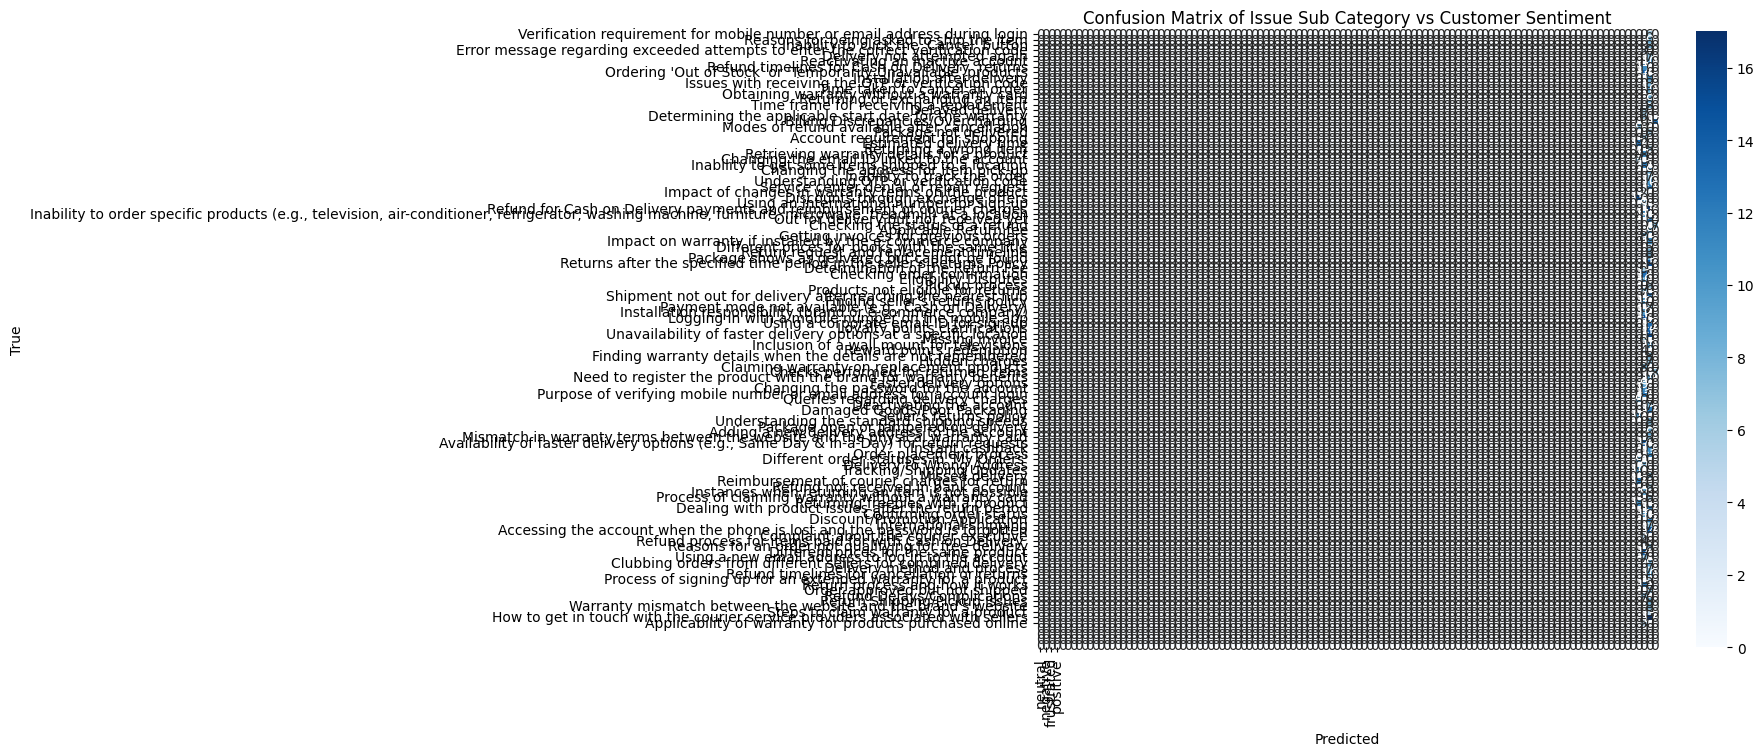

In [50]:
# prompt: make a confusion matrix using 'issue_sub_category' and 'customer_sentiment'

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming 'dataset' is your DataFrame from the previous code
# If not, load it here: dataset = pd.read_csv("your_file.csv")

# Create the confusion matrix
cm = confusion_matrix(dataset['issue_sub_category'], dataset['customer_sentiment'])

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=dataset['customer_sentiment'].unique(),
            yticklabels=dataset['issue_sub_category'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Issue Sub Category vs Customer Sentiment')
plt.show()

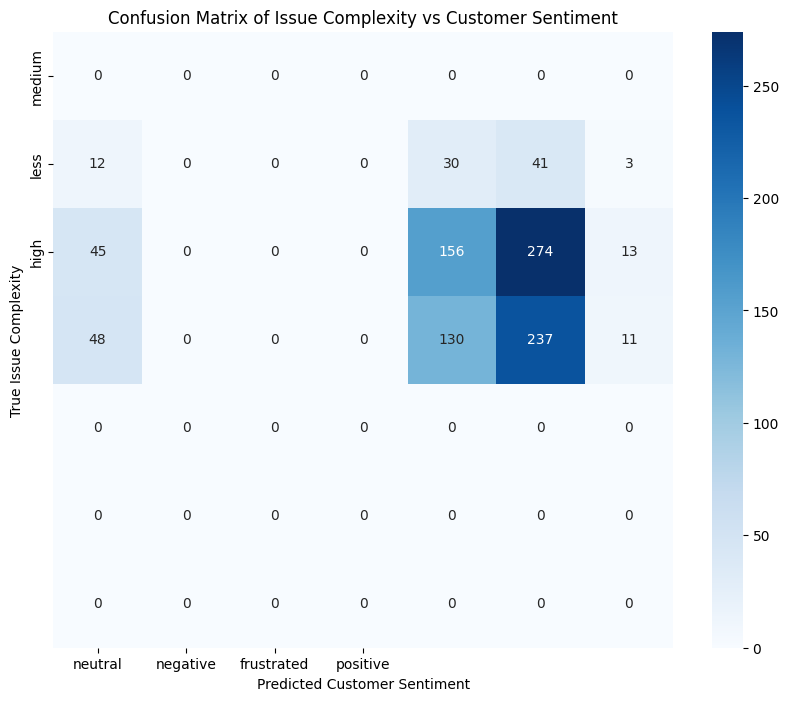

In [51]:
# prompt: Generate 4*4 confusion matrrix for 'issue_complexity' and 'customer_sentiment'

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming 'dataset' is your DataFrame and it contains 'issue_complexity' and 'customer_sentiment' columns.
# Replace 'dataset' with your actual DataFrame variable if necessary.

# Create the confusion matrix
cm = confusion_matrix(dataset['issue_complexity'], dataset['customer_sentiment'])

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=dataset['customer_sentiment'].unique(),
            yticklabels=dataset['issue_complexity'].unique())
plt.xlabel('Predicted Customer Sentiment')
plt.ylabel('True Issue Complexity')
plt.title('Confusion Matrix of Issue Complexity vs Customer Sentiment')
plt.show()

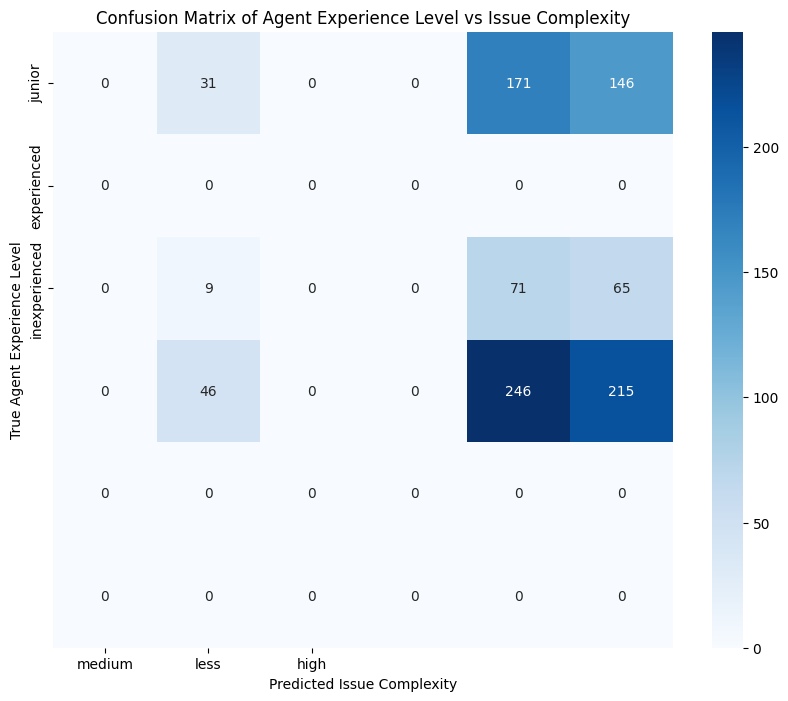

In [52]:
# prompt: generatee confusion matrix for 'agent_experience_level' and 'issue_complexity'

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming 'dataset' is your DataFrame and it contains 'agent_experience_level' and 'issue_complexity' columns.
# Replace 'dataset' with your actual DataFrame variable if necessary.

# Create the confusion matrix
cm = confusion_matrix(dataset['agent_experience_level'], dataset['issue_complexity'])

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=dataset['issue_complexity'].unique(),
            yticklabels=dataset['agent_experience_level'].unique())
plt.xlabel('Predicted Issue Complexity')
plt.ylabel('True Agent Experience Level')
plt.title('Confusion Matrix of Agent Experience Level vs Issue Complexity')
plt.show()